#### Hypothesis Testing
In this notebook I performed different hypothesis tests to establish the relationships between variables in the data. The data consists of features of patients examined for heart disease. The following hypothesis tests were performed:
- One Sample T-Test
- Binomial Test
- Two Sample T-Test
- Chi-Square Test
- ANOVA (Analysis Of The Variance) with Tukey's Range Test

In [1]:
#Importing some of the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import binom_test
import random

The data was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) and then cleaned for analysis. The principal investigators responsible for data collection were:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
#Creating a dataframe called heart from the heart_disease csv file
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


- age: The patient's age
- sex: The patient's sex (Male/Female)
- trestbps: The patient's resting blood pressure
- chol: serum cholestorol in mg/dl
- cp: Chest pain type
- exang: Exercise induced angina
- fbs: An indicator for whether fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false)
- thalach: Maximum heart rate achieved
- heart_disease: Presence or absence of heart disease

In [3]:
#Information on the data
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    object 
 2   trestbps       303 non-null    float64
 3   chol           303 non-null    float64
 4   cp             303 non-null    object 
 5   exang          303 non-null    float64
 6   fbs            303 non-null    float64
 7   thalach        303 non-null    float64
 8   heart_disease  303 non-null    object 
dtypes: float64(6), object(3)
memory usage: 21.4+ KB


In [4]:
#Separating the data into two - patients with heart disease and patients without
present_heart_disease = heart[heart['heart_disease'] == 'presence']
absent_heart_disease = heart[heart['heart_disease'] == 'absence']

Generally, cholestrol levels higher than 240 mg/dl are considered to be high and therefore unhealthy. Do people with heart disease have high cholesterol levels (greater than or equal to 240 mg/dl) on average? 

- <b>Null: People with heart disease have an average cholesterol level equal to 240 mg/dl</b>
- <b>Alternative: People with heart disease have an average cholesterol level that is greater than 240 mg/dl</b>

In [5]:
#Calculate the average cholestrol level for patients with heart disease
avg_chol_heart_disease = np.mean(present_heart_disease['chol'])
avg_chol_heart_disease

251.4748201438849

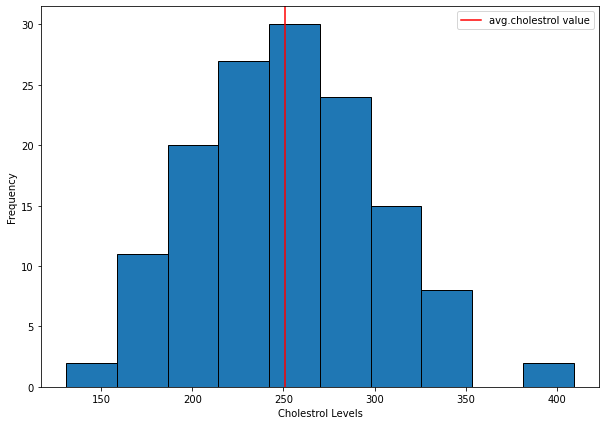

In [6]:
#Distribution of cholestrol levels among patients with heart disease
plt.figure(figsize = (10, 7))
plt.hist(present_heart_disease['chol'], edgecolor = 'black')
plt.axvline(251, color = 'red', label = 'avg.cholestrol value')
plt.xlabel('Cholestrol Levels' )
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [7]:
#Number of patients with heart disease
num_heart_disease = len(present_heart_disease)
num_heart_disease

139

In [8]:
#Cholesterol levels in patients with heart disease
chol_heart_disease = present_heart_disease['chol']

In [9]:
tstat, pval = ttest_1samp(chol_heart_disease, 240, alternative = 'greater')
print(pval)

0.0035411033905155707


With a significant threshold of 0.05, and obtaining a p-value less than 0.05, suggesting that heart disease patients have an average cholesterol level significantly higher than 240 mg/dl.

In [10]:
chol_no_heart_disease = absent_heart_disease['chol']

Now we can investigate the cholestrol levels present among patients without heart disease. Do patients without heart disease have average cholesterol levels significantly above 240 mg/dl?
- <b>Null: People without heart disease have an average cholesterol level equal to 240 mg/dl</b>
- <b>Alternative: People without heart disease have an average cholesterol level that is greater than 240 mg/dl</b>

In [11]:
tstat, pval = ttest_1samp(chol_no_heart_disease, 240, alternative = 'greater')
print(pval)

0.26397120232220506


In this case, we go with the null hypothesis that, people without heart disease have an average cholesterol level of 240.

Sometimes, part of an analysis will involve comparing a sample to known population values to see if the sample appears to be representative of the general population.

By some estimates, about 8% of the U.S. population had diabetes (diagnosed or undiagnosed) in 1988 when this data was collected. While there are multiple tests that contribute to a diabetes diagnosis, fasting blood sugar levels greater than 120 mg/dl can be indicative of diabetes (or at least, pre-diabetes). 

In [12]:
#If the sample were representative of the population, the number of people with diabetes will be:
print(0.08 * 303)

24.240000000000002


In [13]:
#Number of people with diabetes in the sample:
number_diabetes = len(heart[heart['fbs'] == 1])
number_diabetes

45

Does this sample come from a population in which the rate of fbs > 120 mg/dl is equal to 8%? Import the function from scipy.stats that you can use to test the following null and alternative hypotheses:

- Null: This sample was drawn from a population where 8% of people have fasting blood sugar > 120 mg/dl
- Alternative: This sample was drawn from a population where more than 8% of people have fasting blood sugar > 120 mg/dl

In [14]:
sim_one_patient = np.random.choice(['diabetes', 'no diabetes'], p = [0.08, 0.92], size = 1)
sim_one_patient

array(['no diabetes'], dtype='<U11')

In [15]:
sim_303_patients = np.random.choice(['diabetes', 'no diabetes'], p = [0.08, 0.92], size = 303)
print(list(sim_303_patients))

['no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'diabetes', 'no diabetes', 'no diabetes', 'diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no diabetes', 'no

In [16]:
null_outcomes = []
for i in range(10000):
    sim = np.random.choice(['diabetes', 'no diabetes'], p = [0.08, 0.92], size = 303)
    num_diabetes = np.sum(sim == 'diabetes')
    null_outcomes.append(num_diabetes)

In [17]:
print('minimum number with diabetes:', np.min(null_outcomes))

minimum number with diabetes: 9


In [18]:
print('maximum number with diabetes:', np.max(null_outcomes))

maximum number with diabetes: 44


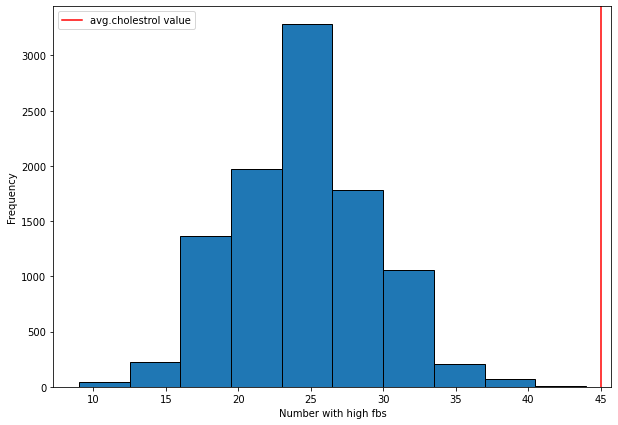

In [19]:
#The null distribution of diabetes patients
plt.figure(figsize = (10, 7))
plt.hist(null_outcomes, edgecolor = 'black')
plt.axvline(45, color = 'red', label = 'avg.cholestrol value')
plt.xlabel('Number with high fbs' )
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [20]:
num_patients = len(heart)
pval = binom_test(number_diabetes, num_patients, 0.08, alternative = 'greater')
print(pval)

4.689471951448875e-05


a p-value of 4.689471951449078e-05 which is equivalent to 0.0000469 (the e-5 at the end indicates scientific notation). This is less than 0.05, indicating that this sample likely comes from a population where more than 8% of people have fbs > 120 mg/dl.

Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Will knowing a patient's thalach value give us an idea about whether he has a heart disease or not?

Firstly, we can plot side by side boxplots of the thalach values for the two groups of patients (heart disease, and no heart disease) to visually inspect if there is an association between them. Also we can compare the difference in means the thalach values for the two groups.

In [21]:
#Thalach values for patients with heart diease
thalach_hd = heart[heart['heart_disease'] == 'presence']['thalach']

#mean of thalach_hd
mean_thd = np.mean(thalach_hd)
print('Avg. thalach for patients with heart disease is {}'.format(mean_thd))

#Thalach values for patients without heart disease
thalach_no_hd = heart[heart['heart_disease'] == 'absence']['thalach']

#mean of thalach_no_hd
mean_tnd = np.mean(thalach_no_hd)
print('Avg. thalach for patients with no heart disease is {}'.format(mean_tnd))


#difference in the means
print('Mean difference: {}'.format(mean_tnd - mean_thd))

Avg. thalach for patients with heart disease is 139.25899280575538
Avg. thalach for patients with no heart disease is 158.3780487804878
Mean difference: 19.11905597473242


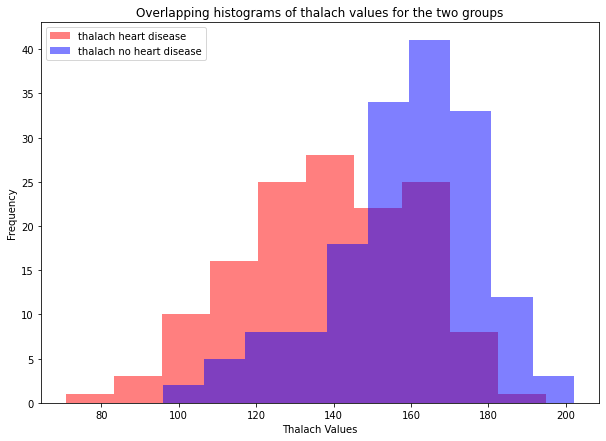

In [22]:
plt.figure(figsize = (10, 7))
plt.hist(thalach_hd, alpha = 0.5, label = 'thalach heart disease', color = 'red')
plt.hist(thalach_no_hd, alpha = 0.5, label = 'thalach no heart disease', color = 'blue')
plt.xlabel('Thalach Values')
plt.ylabel('Frequency')
plt.title('Overlapping histograms of thalach values for the two groups')
plt.legend()
plt.show()

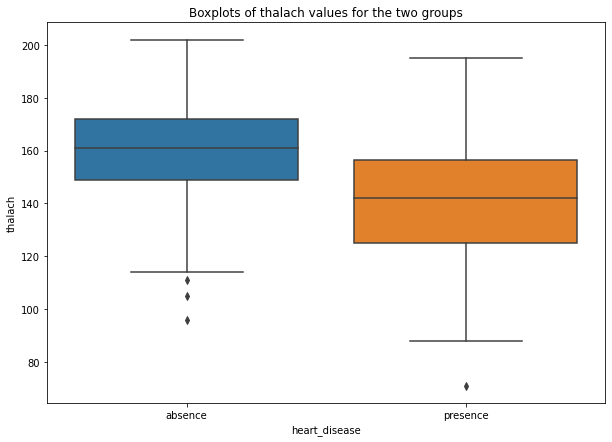

In [23]:
#Side by side boxplots of the thalach values for the two groups
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'heart_disease', y = 'thalach', data = heart)
plt.title('Boxplots of thalach values for the two groups')
plt.show()

From the two visualizations above, it is not clear if there exists any association between the presence of heart disease and thalach. In essence, we are interested to find out if the average thalach of a patient with heart disease is significantly different from the average thalach of patients without heart disease. If there exists a significant difference, then having knowledge of the thalach of a patient can give us an idea concerning his heart disease status.

This is a comparison between a binary categorical variable (heart_disease - presence and absence) and a quantitative variable (thalach). This makes the two sample t-test appropriate here. Before proceeding with the test, let us clearly state our null and alternative hypothesis:
- Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
- Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

In [24]:
#Importing the two sample t-test library from scipy
from scipy.stats import ttest_ind

#Performing the test
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print('The p-value for this test is:', pval)

The p-value for this test is: 3.456964908430172e-14


This is less than 0.05, so we “reject the null hypothesis” and conclude that there is a significant difference in thalach for people with heart disease compared to people without heart disease.

The above procedure can be repeated for the variables `age`, `trestbps`, `chol` against the presence or absence of heart disease.

In [25]:
#Age and heart disease
#Age values for patients with heart diease
age_hd = heart[heart['heart_disease'] == 'presence']['age']

#mean of age_hd
mean_ahd = np.mean(age_hd)
print('Avg. age for patients with heart disease is {} years.'.format(round(mean_ahd), 0))

#Age values for patients without heart disease
age_no_hd = heart[heart['heart_disease'] == 'absence']['age']

#mean of age_no_hd
mean_and = np.mean(age_no_hd)
print('Avg. age for patients with no heart disease is {} years.'.format(round(mean_and), 0))


#difference in the means
print('Mean difference: {} years.'.format(round(mean_ahd - mean_and), 0))

Avg. age for patients with heart disease is 57 years.
Avg. age for patients with no heart disease is 53 years.
Mean difference: 4 years.


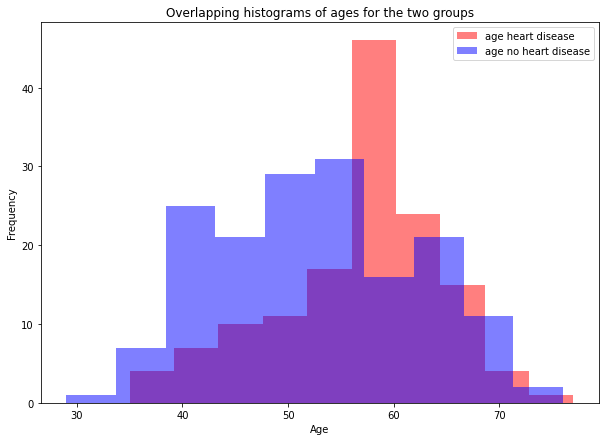

In [26]:
#Overlapping histogram for the two groups
plt.figure(figsize = (10, 7))
plt.hist(age_hd, alpha = 0.5, label = 'age heart disease', color = 'red')
plt.hist(age_no_hd, alpha = 0.5, label = 'age no heart disease', color = 'blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Overlapping histograms of ages for the two groups')
plt.legend()
plt.show()

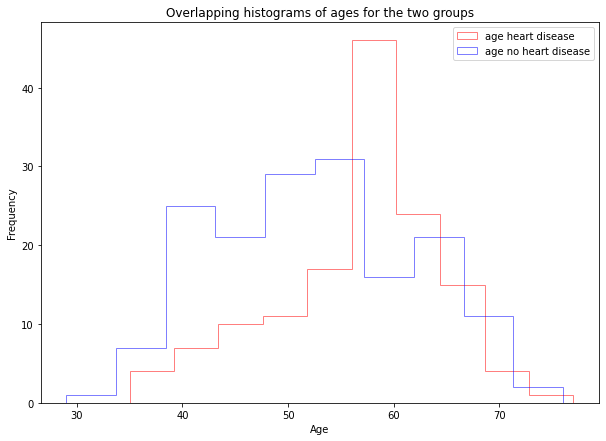

In [27]:
plt.figure(figsize = (10, 7))
plt.hist(age_hd, alpha = 0.5, label = 'age heart disease', color = 'red', histtype = 'step')
plt.hist(age_no_hd, alpha = 0.5, label = 'age no heart disease', color = 'blue', histtype = 'step')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Overlapping histograms of ages for the two groups')
plt.legend()
plt.show()

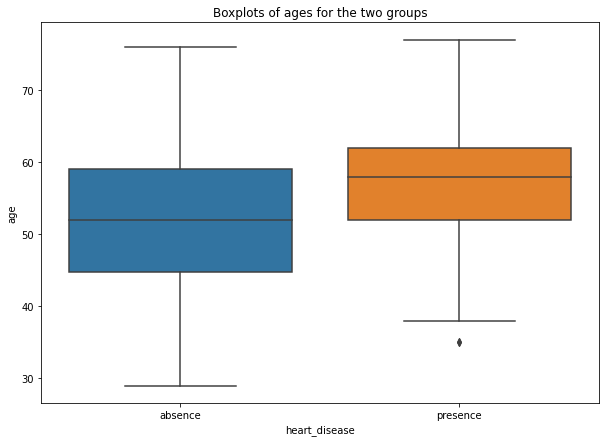

In [28]:
#Side by side boxplots of ages for the two groups
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'heart_disease', y = 'age', data = heart)
plt.title('Boxplots of ages for the two groups')
plt.show()

Using the overlapping histograms and boxplots, it shows that there is no significant difference in the ages of the patients with and patients without heart disease. We can only be sure by coming up with a null and alternative hypothesis and testing them to arrive at conclusive results.

- Null: The average age for a person with heart disease is equal to the average age for a person without heart disease.
- Alternative: The average age for a person with heart disease is NOT equal to the average age for a person without heart disease.

With a significant threshold set at 0.05, obtaining a p-value less than 0.05 leads to the rejection of the null hypothesis and settling for the alternative.

In [29]:
#performing the two sample t-test
tsat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value for `age` two-sample t-test: ', pval)

p-value for `age` two-sample t-test:  8.955636917529706e-05


The next variable to test is the `trestbps`. It is the resting blood pressure of the patients. 

- Null Hypothesis: The average `trestbps` for a person with heart disease is equal to the average `trestbps` for a person without heart disease.
- Alternative Hypothesis: The average `trestbps` for a person with heart disease is NOT equal to that of a person with heart disease.

In [33]:
#Resting Blood Pressure and heart disease
#trestbps values for patients with heart diease
trestbps_hd = heart[heart['heart_disease'] == 'presence']['trestbps']

#mean of trestbps_hd
mean_trest_hd = np.mean(trestbps_hd)
print('Avg. resting blood pressure for patients with heart disease is {} years.'.format(mean_trest_hd))

#trestbps values for patients without heart disease
trestbps_no_hd = heart[heart['heart_disease'] == 'absence']['trestbps']

#mean of trestbps_no_hd
mean_trest_no_hd = np.mean(trestbps_no_hd)
print('Avg. resting blood pressure for patients with no heart disease is {} years.'.format(mean_trest_no_hd))


#difference in the means
print('Mean difference: {}.'.format(mean_trest_hd - mean_trest_no_hd))

Avg. resting blood pressure for patients with heart disease is 134.568345323741 years.
Avg. resting blood pressure for patients with no heart disease is 129.25 years.
Mean difference: 5.318345323740999.


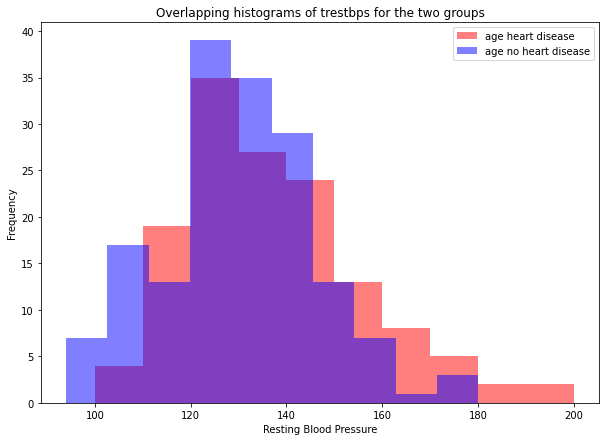

In [34]:
#Overlapping histogram of trestbps for the two groups
plt.figure(figsize = (10, 7))
plt.hist(trestbps_hd, alpha = 0.5, label = 'trestbps heart disease', color = 'red')
plt.hist(trestbps_no_hd, alpha = 0.5, label = 'trestbps no heart disease', color = 'blue')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.title('Overlapping histograms of trestbps for the two groups')
plt.legend()
plt.show()

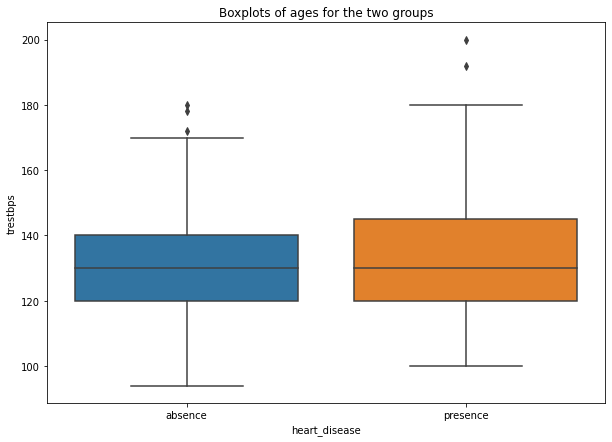

In [35]:
#Side by side boxplots of trestbps for the two groups
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'heart_disease', y = 'trestbps', data = heart)
plt.title('Boxplots of ages for the two groups')
plt.show()

The visualizations suggest there is no significant difference between the resting blood pressure for patients with heart disease and patients without heart disease.

In [36]:
#Performing the two sample t-test
tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print('p-value for `trestbps` two-sample t-test: ', pval)

p-value for `trestbps` two-sample t-test:  0.008548268928594928


Observing a p-value of 0.0085